In [67]:
import matplotlib.pyplot as plt

In [74]:
from nltk.stem.wordnet import WordNetLemmatizer

import nltk  # FreqDist, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

import string

[nltk_data] Downloading package punkt to /Users/Rich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Rich/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect('jobs.db')
c = conn.cursor()

In [5]:
c.execute("""SELECT company, description FROM listings""")

rows = c.fetchall()

print(len(rows))

980


In [6]:
rows[0]

(0,
 'Data Scientist',
 'Datadog',
 'New York, NY',
 "About DatadogWe're on a mission to build the best platform in the world for engineers to understand and scale their systems, applications, and teams. We operate at high scale—trillions of data points per day—providing always-on alerting, metrics visualization, logs, and application tracing for tens of thousands of companies. Our engineering culture values pragmatism, honesty, and simplicity to solve hard problems the right way.The OpportunityYou will have a fantastic team of data engineers to support you, a collaborative environment to encourage your work, and the best technologies for performing data science at high scale in your toolkit.You Will Present the latest academic research papers to your team. Research and benchmark the latest algorithms that can be used for our particular use-cases. Apply machine learning algorithms and statistical techniques to build new product features. Deploy a new feature to production, instantly af

In [11]:
c.execute("""SELECT company, description FROM listings""")

rows = c.fetchall()

print(rows[0][1])

About DatadogWe're on a mission to build the best platform in the world for engineers to understand and scale their systems, applications, and teams. We operate at high scale—trillions of data points per day—providing always-on alerting, metrics visualization, logs, and application tracing for tens of thousands of companies. Our engineering culture values pragmatism, honesty, and simplicity to solve hard problems the right way.The OpportunityYou will have a fantastic team of data engineers to support you, a collaborative environment to encourage your work, and the best technologies for performing data science at high scale in your toolkit.You Will Present the latest academic research papers to your team. Research and benchmark the latest algorithms that can be used for our particular use-cases. Apply machine learning algorithms and statistical techniques to build new product features. Deploy a new feature to production, instantly affecting customers with your work. Mentor other data sc

#### Observing data

In [15]:
import random

In [63]:
rand_entry = random.randint(0,len(rows))
entry = rows[rand_entry][1]
print(entry)
print('---')
print(len(entry))

Summary:As a Manager- Precision Medicine you will work closely with Director, Precision Medicine and other key personnel to implement and operationalize Precision Medicine goals within Regeneron's clinical trials. Manages central laboratory and specialty vendors on clinical trials. Presents at investigators meetings and builds training materials (Lab Manual, Sample Collection Procedures, presentation slides, etc.). Supports and/or manages Senior Associates and Associate Managers to execute team the organizations goals.Job ResponsibilitiesStudy Team SupportParticipates in cross-functional study teams and sub-teams.Manages acquisition of clinical trial samples designated for biomarkers, precision medicine and/or exploratory research under supervision of more senior personnel.Supports individual clinical study teams as the need arises for all technical and operational sample-related matters for assigned projects by collaborating closely with internal partners.Operational Support of Biomar

#### Notes:
- Overall there are just text datas
- Some entries have hyphens, bullet points 
- Some words are mashed together
- Most entries are quite long (atleast 1000 chars long)
- Some entries have the "This company is an Equal Opportunity provider . . .. "
- See "Show more Show less often

In [83]:
list_stopwords = stopwords.words('english')
list_stopwords += list(string.punctuation)
list_stopwords += ['show','company','description','summary','']

In [93]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
tokenized_list = tokenizer.tokenize(entry)

In [94]:
stopwords_removed = [token.lower() for token in tokenized_list if token.lower() not in list_stopwords]

In [95]:
list(map(len,[token_list, stopwords_removed]))

[612, 392]

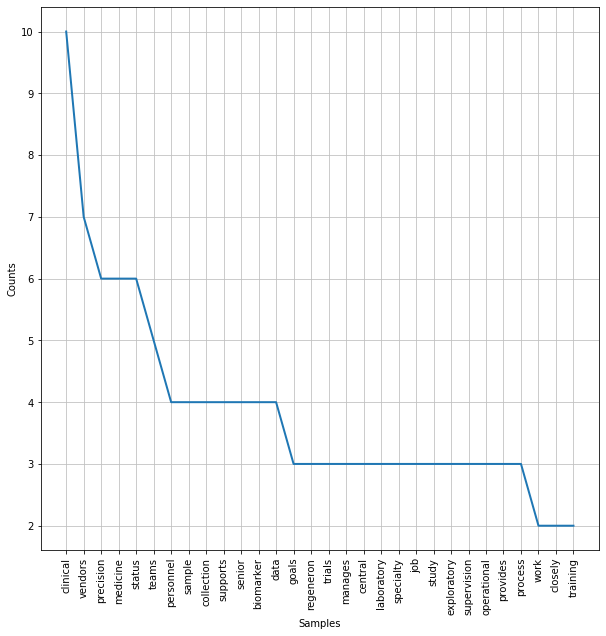

In [96]:
fdist = FreqDist(stopwords_removed)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [69]:
lemmatizer = WordNetLemmatizer() 

In [77]:
lemma_list = [lemmatizer.lemmatize(word) for word in stopwords_removed]

In [78]:
lemma_list

['company',
 'descriptiontwitter',
 '’',
 'happening',
 'people',
 'talking',
 'right',
 'u',
 'life',
 "'s",
 'job',
 "'s",
 'purpose',
 'believe',
 'real',
 'change',
 'start',
 'conversation',
 'voice',
 'matter',
 'come',
 'together',
 "'ll",
 "'s",
 'right',
 "'s",
 'easy',
 'serve',
 'public',
 'conversation.job',
 'descriptionwho',
 'twitter',
 "'s",
 'discovery',
 'team',
 'dedicated',
 'getting',
 'majority',
 'world',
 'converse',
 'public',
 'using',
 'twitter',
 'composed',
 'many',
 'team',
 'across',
 'company',
 'including',
 'product',
 'engineering',
 'design',
 'research',
 'team',
 'responsible',
 'understanding',
 'need',
 'user',
 'including',
 'new',
 'user',
 'user',
 'active',
 'help',
 'discover',
 'value',
 'twitter',
 'building',
 'personalized',
 'products.the',
 'mission',
 'instantly',
 'connect',
 'people',
 'conversation',
 'audience',
 'meaningful',
 'realize',
 'goal',
 'involves',
 'work',
 'area',
 'machine',
 'learning',
 'applied',
 'data',
 'scien

In [80]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [89]:
tokenizer.tokenize(entry)

['Summary',
 'As',
 'a',
 'Manager',
 'Precision',
 'Medicine',
 'you',
 'will',
 'work',
 'closely',
 'with',
 'Director',
 'Precision',
 'Medicine',
 'and',
 'other',
 'key',
 'personnel',
 'to',
 'implement',
 'and',
 'operationalize',
 'Precision',
 'Medicine',
 'goals',
 'within',
 'Regeneron',
 's',
 'clinical',
 'trials',
 'Manages',
 'central',
 'laboratory',
 'and',
 'specialty',
 'vendors',
 'on',
 'clinical',
 'trials',
 'Presents',
 'at',
 'investigators',
 'meetings',
 'and',
 'builds',
 'training',
 'materials',
 'Lab',
 'Manual',
 'Sample',
 'Collection',
 'Procedures',
 'presentation',
 'slides',
 'etc',
 'Supports',
 'and',
 'or',
 'manages',
 'Senior',
 'Associates',
 'and',
 'Associate',
 'Managers',
 'to',
 'execute',
 'team',
 'the',
 'organizations',
 'goals',
 'Job',
 'ResponsibilitiesStudy',
 'Team',
 'SupportParticipates',
 'in',
 'cross',
 'functional',
 'study',
 'teams',
 'and',
 'sub',
 'teams',
 'Manages',
 'acquisition',
 'of',
 'clinical',
 'trial',
 'sa